<a href="https://colab.research.google.com/github/Emma-Cap/Deep-Learning-Project/blob/main/DeepLearning_Progetto_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Progetto di Deep Learning**

Importo il file + librerie necessarie

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("danielshanbalico/dog-vs-not-dog")

print("Path to dataset files:", path)



100%|██████████| 2.86G/2.86G [00:38<00:00, 78.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/danielshanbalico/dog-vs-not-dog/versions/1


In [ ]:
# Percorso alla cartella che contiene 'Dog vs Not-Dog'
dataset_path = '/root/.cache/kagglehub/datasets/danielshanbalico/dog-vs-not-dog/versions/1'

# Lista dei file e cartelle in 'versions/1'
contents = os.listdir(dataset_path)
print("Contenuto di 'versions/1':", contents)


Contenuto di 'versions/1': ['Dog vs Not-Dog']


In [ ]:
# Percorso alla cartella 'Dog vs Not-Dog'
dog_not_dog_path = os.path.join(dataset_path, 'Dog vs Not-Dog')

# Lista dei file e cartelle in 'Dog vs Not-Dog'
dog_not_dog_contents = os.listdir(dog_not_dog_path)
print("Contenuto di 'Dog vs Not-Dog':", dog_not_dog_contents)


Contenuto di 'Dog vs Not-Dog': ['labels.csv', 'dog', 'other']


In [ ]:
# Inizializziamo le variabili
image_folders = []
labels_csv = ''

for item in dog_not_dog_contents:
    item_path = os.path.join(dog_not_dog_path, item)
    if os.path.isdir(item_path):
        image_folders.append(item)
    elif item.endswith('.csv'):
        labels_csv = item

print("Cartelle immagini:", image_folders)
print("File CSV delle etichette:", labels_csv)



Cartelle immagini: ['dog', 'other']
File CSV delle etichette: labels.csv


In [ ]:
import pandas as pd

# Percorso al file CSV
labels_csv_path = os.path.join(dog_not_dog_path, labels_csv)

# Carichiamo il DataFrame
labels_df = pd.read_csv(labels_csv_path)
print("Prime righe del file CSV:")
print(labels_df.head())


Prime righe del file CSV:
   Unnamed: 0                                 filename  label
0           0   QYjQz1LS7dATFSYYRfnOfk6ezX8Gp49589.jpg  other
1           1   rltnrLmjyQgZnuSpbTKjPrm24wjHL43876.jpg  other
2           2  LNZNJPLSMhZAo8siLJlLVdHoxCTU5T11617.jpg  other
3           3   5ghe8eSnGWzfpowvy0oeLnqkEPqYbO8045.jpg  other
4           4  2V3zbjyoxmG3zKDyxTpN2GpEvVolj811765.jpg    dog


In [ ]:
from torch.utils.data import Dataset
from PIL import Image

class DogNotDogDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.labels_df = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.labels_df)

    def __getitem__(self, idx):
        img_name = self.labels_df.iloc[idx]['filename']
        label = self.labels_df.iloc[idx]['label']

        # Determiniamo la cartella in base all'etichetta
        if label == 'dog':
            folder = 'dog'
        else:
            folder = 'other'

        img_path = os.path.join(self.root_dir, folder, img_name)

        if not os.path.exists(img_path):
            raise FileNotFoundError(f"Immagine {img_name} non trovata nel percorso {img_path}.")

        # Carichiamo l'immagine
        image = Image.open(img_path).convert('RGB')

        # Applichiamo le trasformazioni
        if self.transform:
            image = self.transform(image)

        # Convertiamo l'etichetta in numerico
        label = 1 if label == 'dog' else 0

        return image, label


In [ ]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])


In [ ]:
# Percorso alla cartella root delle immagini
root_dir = dog_not_dog_path

# Creiamo il dataset
dataset = DogNotDogDataset(csv_file=labels_csv_path, root_dir=root_dir, transform=transform)

# Percorso alla cartella principale del dataset
dataset_path = '/root/.cache/kagglehub/datasets/danielshanbalico/dog-vs-not-dog/versions/1/Dog vs Not-Dog'

# Percorso al file CSV delle etichette
labels_csv_path = os.path.join(dataset_path, 'labels.csv')

# Percorsi alle cartelle delle immagini
dog_dir = os.path.join(dataset_path, 'dog')
other_dir = os.path.join(dataset_path, 'other')

# Carico il DataFrame delle etichette
labels_df = pd.read_csv(labels_csv_path)
print("Prime 5 righe del DataFrame:")
print(labels_df.head())


# Conto il numero di immagini per ciascuna classe
class_counts = labels_df['label'].value_counts()
print("Numero di immagini per classe:")
print(class_counts)




Prime 5 righe del DataFrame:
   Unnamed: 0                                 filename  label
0           0   QYjQz1LS7dATFSYYRfnOfk6ezX8Gp49589.jpg  other
1           1   rltnrLmjyQgZnuSpbTKjPrm24wjHL43876.jpg  other
2           2  LNZNJPLSMhZAo8siLJlLVdHoxCTU5T11617.jpg  other
3           3   5ghe8eSnGWzfpowvy0oeLnqkEPqYbO8045.jpg  other
4           4  2V3zbjyoxmG3zKDyxTpN2GpEvVolj811765.jpg    dog
Numero di immagini per classe:
label
other    12562
dog      12562
Name: count, dtype: int64


Esplorazione dati

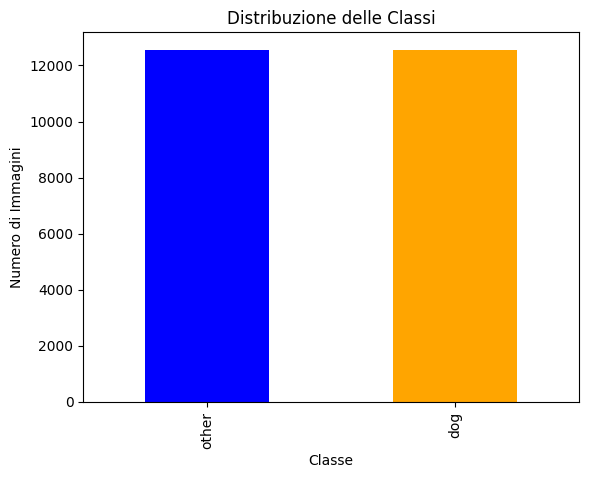

In [ ]:
# Grafico a barre della distribuzione delle classi
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribuzione delle Classi')
plt.xlabel('Classe')
plt.ylabel('Numero di Immagini')
plt.show()


In [ ]:
# Controllo se tutti i file elencati nel CSV esistono nelle rispettive cartelle
missing_files = []

for idx, row in labels_df.iterrows():
    img_name = row['filename']
    label = row['label']
    img_path = os.path.join(dataset_path, label, img_name)

    if not os.path.exists(img_path):
        missing_files.append(img_name)

print(f"Numero di file mancanti: {len(missing_files)}")
if missing_files:
    print("Elenco dei file mancanti:")
    print(missing_files)
else:
    print("Non ci sono file mancanti.")


Numero di file mancanti: 0
Non ci sono file mancanti.


Visualizzo 5 immagini della classe 'dog':


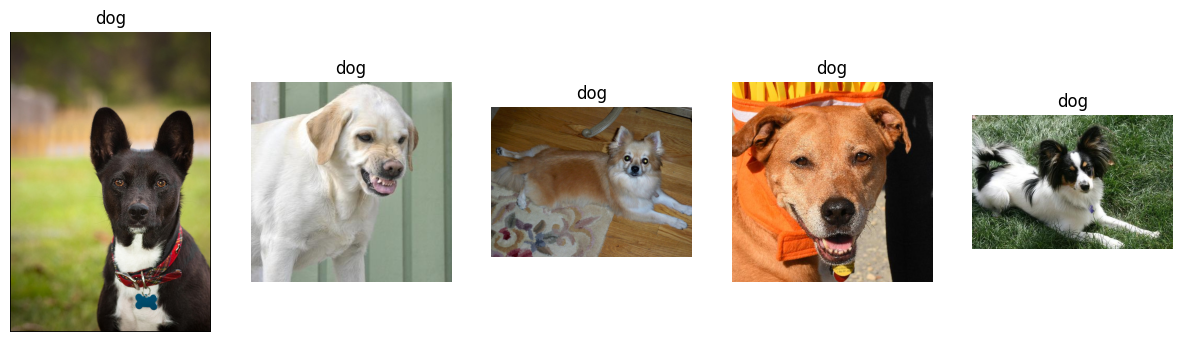

Visualizzo 5 immagini della classe 'other':


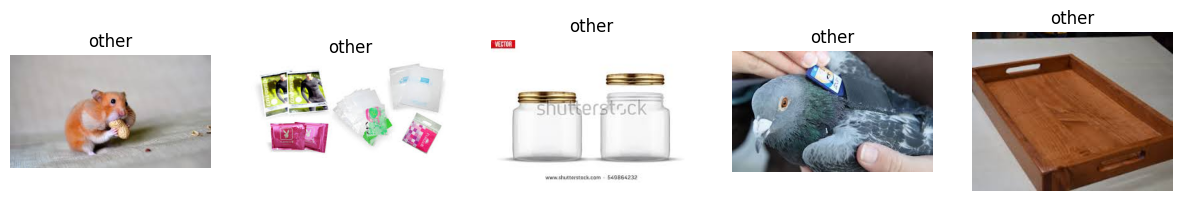

In [ ]:
# Funzione per visualizzare immagini campione di una classe
def show_sample_images(class_label, num_images=5):
    print(f"Visualizzo {num_images} immagini della classe '{class_label}':")
    img_dir = os.path.join(dataset_path, class_label)
    img_files = os.listdir(img_dir)[:num_images]

    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(img_files):
        img_path = os.path.join(img_dir, img_name)
        img = Image.open(img_path)
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.title(f"{class_label}")
        plt.axis('off')
    plt.show()

# Visualizzo immagini di cani
show_sample_images('dog')

# Visualizzo immagini di non-cani
show_sample_images('other')


In [ ]:
# Controllo le dimensioni delle immagini
image_sizes = []

for idx, row in labels_df.iterrows():
    img_name = row['filename']
    label = row['label']
    img_path = os.path.join(dataset_path, label, img_name)

    with Image.open(img_path) as img:
        image_sizes.append(img.size)

# Conto le occorrenze di ciascuna dimensione
from collections import Counter
size_counts = Counter(image_sizes)

print("Distribuzione delle dimensioni delle immagini:")
for size, count in size_counts.items():
    print(f"Dimensioni: {size}, Numero di immagini: {count}")


Output streaming troncato alle ultime 5000 righe.
Dimensioni: (428, 492), Numero di immagini: 1
Dimensioni: (192, 263), Numero di immagini: 4
Dimensioni: (340, 290), Numero di immagini: 1
Dimensioni: (750, 621), Numero di immagini: 1
Dimensioni: (1024, 613), Numero di immagini: 2
Dimensioni: (369, 640), Numero di immagini: 1
Dimensioni: (202, 249), Numero di immagini: 5
Dimensioni: (639, 406), Numero di immagini: 1
Dimensioni: (236, 378), Numero di immagini: 2
Dimensioni: (396, 600), Numero di immagini: 1
Dimensioni: (350, 414), Numero di immagini: 1
Dimensioni: (601, 309), Numero di immagini: 1
Dimensioni: (370, 136), Numero di immagini: 3
Dimensioni: (2640, 4037), Numero di immagini: 1
Dimensioni: (511, 630), Numero di immagini: 1
Dimensioni: (1600, 1710), Numero di immagini: 2
Dimensioni: (500, 445), Numero di immagini: 4
Dimensioni: (475, 379), Numero di immagini: 1
Dimensioni: (760, 443), Numero di immagini: 1
Dimensioni: (448, 433), Numero di immagini: 1
Dimensioni: (577, 761), N

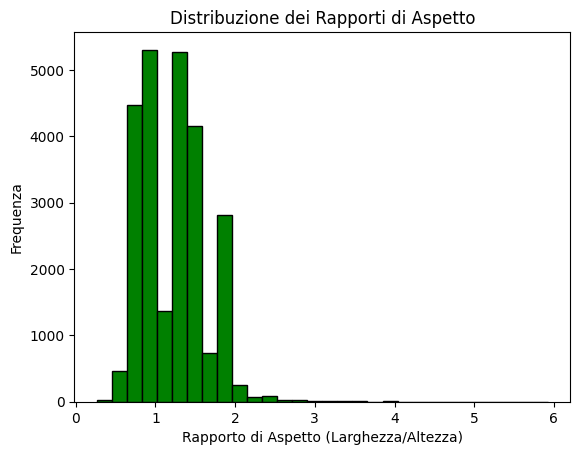

In [ ]:
# Calcolo il rapporto di aspetto (larghezza/altezza) delle immagini
# Questo mi aiuta a capire se le immagini hanno proporzioni simili o se c'è una grande variabilità
aspect_ratios = []

for idx, row in labels_df.iterrows():
    img_name = row['filename']
    label = row['label']
    img_path = os.path.join(dataset_path, label, img_name)

    with Image.open(img_path) as img:
        width, height = img.size
        aspect_ratio = width / height
        aspect_ratios.append(aspect_ratio)

# Visualizzo la distribuzione dei rapporti di aspetto
plt.hist(aspect_ratios, bins=30, color='green', edgecolor='black')
plt.title('Distribuzione dei Rapporti di Aspetto')
plt.xlabel('Rapporto di Aspetto (Larghezza/Altezza)')
plt.ylabel('Frequenza')
plt.show()


In [ ]:
# Calcolo le percentuali delle classi
total_images = len(labels_df)
dog_count = class_counts['dog']
other_count = class_counts['other']

dog_percentage = (dog_count / total_images) * 100
other_percentage = (other_count / total_images) * 100

print(f"Percentuale di immagini di cani: {dog_percentage:.2f}%")
print(f"Percentuale di immagini di non-cani: {other_percentage:.2f}%")


Percentuale di immagini di cani: 50.00%
Percentuale di immagini di non-cani: 50.00%


Controllo per implementazione dei modelli. questi codici poi andranno tolti

In [ ]:
import pandas as pd

# Percorso al file labels.csv
labels_csv_path = '/root/.cache/kagglehub/datasets/danielshanbalico/dog-vs-not-dog/versions/1/Dog vs Not-Dog/labels.csv'

# Carichiamo il DataFrame delle etichette
labels_df = pd.read_csv(labels_csv_path)
print("Prime 5 righe del DataFrame:")
print(labels_df.head())


Prime 5 righe del DataFrame:
   Unnamed: 0                                 filename  label
0           0   QYjQz1LS7dATFSYYRfnOfk6ezX8Gp49589.jpg  other
1           1   rltnrLmjyQgZnuSpbTKjPrm24wjHL43876.jpg  other
2           2  LNZNJPLSMhZAo8siLJlLVdHoxCTU5T11617.jpg  other
3           3   5ghe8eSnGWzfpowvy0oeLnqkEPqYbO8045.jpg  other
4           4  2V3zbjyoxmG3zKDyxTpN2GpEvVolj811765.jpg    dog
